# __Projet 3__

Emilie Cayatte & Cécile-Aurore Wotawa

Nous avons commencé par remettre toutes les lignes de code du projet numérique énoncé 2020.

In [21]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

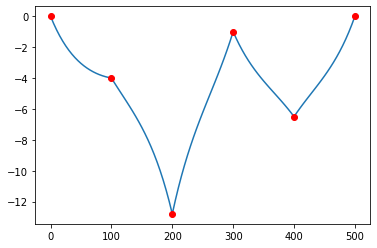

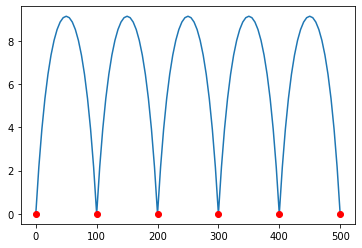

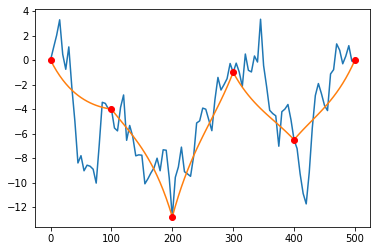

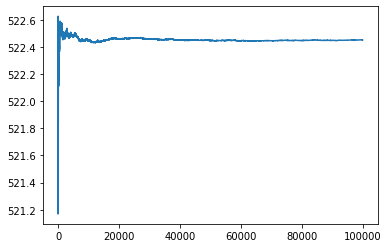

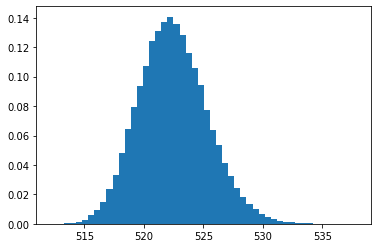

0.18526

In [10]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)

distmat=abs(np.subtract.outer(discretization,discretization))

Sigma=Covexp(distmat,a,sigma2)

SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

sum(result)/K
length(allval1,Delta)

indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

plt.hist(result,50,density=True)
plt.show()

Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

np.quantile(result,[0.025,0.975])

np.mean(result>525)

In [11]:
print (SigmaObs)


[[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]


In [12]:
C1= np.linalg.inv(SigmaObs)
print(C1)

[[ 8.48881134e-02 -1.14883569e-02  2.07184078e-19 -6.72396707e-20
  -8.03731765e-22  4.92312702e-22]
 [-1.14883569e-02  8.64428934e-02 -1.14883569e-02  2.64466612e-19
  -5.89808616e-20  4.46172637e-21]
 [ 3.85478219e-19 -1.14883569e-02  8.64428934e-02 -1.14883569e-02
   2.64466612e-19 -3.93403961e-20]
 [-5.96781493e-20  3.85478219e-19 -1.14883569e-02  8.64428934e-02
  -1.14883569e-02  1.26023493e-19]
 [ 2.78115631e-21 -5.96781493e-20  3.85478219e-19 -1.14883569e-02
   8.64428934e-02 -1.14883569e-02]
 [ 5.77005692e-22  2.85924554e-21 -5.92911925e-20  3.77454029e-19
  -1.14883569e-02  8.48881134e-02]]


In [28]:
I=np.array([1,1,1,1,1,1], float)
B=I.T
D= np.dot(B,C1)
E=(np.dot(D,I) +0.25)**(-1)
print(E)


1.5368909974762894


In [30]:
F=np.dot(B,C1)
H=np.dot(F,depth)
M=E*(H-1.25)
print(M)

-4.291350330933773


 # question 3 
 On veut montrer que $\mu_{|Z_{OBS}=z_{OBS}}$ $\sim$  $\mathcal{N}(\widehat{\mu}, \widehat{\sigma}^2)$ 


 Donc on va calculer $f_{z_{OBS}, \mu}$ $(Z_{OBS} , \hat\mu)$ 
 $$
 $$

 $f_{z_{OBS}, \mu}$ $(Z_{OBS} , \hat\mu)$ $=$ $f_{\mu | Z_{OBS}=z_{OBS}}$ $(\hat \mu)$ $\times f_{Z_{OBS}=z_{OBS}} (z_{OBS})$

 
$f_{z_{OBS}, \mu}$ $(Z_{OBS} , \hat\mu)$$=$ $f_{z_{OBS} | \mu =\hat \mu}$ $(z_{OBS})$ $\times f_{\mu}(\hat \mu)$


Or  $Z_{OBS} | \mu =\hat \mu$ $\sim$  $\mathcal{N}(\widehat{\mu}, C_{OBS})$ et $\mu \sim$ $\mathcal{N} (-5, 4)$

Donc en prenant $-2ln(f)$ on obtient:
$-2ln(f)= (z_{OBS}-\mathbb{1} \hat \mu)^t C_{OBS}^{-1} (z_{OBS}-\mathbb{1} \hat \mu) + (\frac{5+\hat \mu}{2})^2 + constante$ 


Puisque qu'on cherche $f_{\mu_{|Z_{OBS}=z_{OBS}}}$ on ne s'intéresse qu'aux termes en $\mu$ qu'on note $f_1$


$f_1$ $=$ $\mu^2$ $\times$ $(\mathbb{1}^t C_{OBS}^{-1}\mathbb{1}$ $+ \frac{1}{4})$  $-2  \mu \times (\mathbb{1} C_{OBS}^{-1}z_{OBS}-\frac{5}{4}) + constante'$


On pose 
$$
\hat \sigma^2=(\mathbb{1}^t C_{OBS}^{-1} \mathbb{1}+ \frac{1}{4})^{-1}
$$ 
et
on pose 
$$
\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )
$$

 


 Calculons 
 $$
 f_2(\mu)=\frac{(\mu - \hat \mu)^2}{\hat \sigma^{2}}
 $$
 
 $$
 f_2(\mu)=\mu^2 \times \hat \sigma^{-2}+\hat \mu^2 \times \hat \sigma^{-2} -2\hat \mu \times \mu \times \hat \sigma^{-2}
 $$
 $$
 f_2=\mu^2 \times \hat \sigma^{-2}+\widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )^2-2\widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )\times \mu
 $$
 
 
 Par identification (avec $constante'$ que l'on a pas explicité) on a bien $f_1=f_2$ et donc $\mu_{|Z_{OBS}=z_{OBS}}$ $\sim$  $\mathcal{N}(\widehat{\mu}, \widehat{\sigma}^2)$ 
 